Ejericio 1

Considerar la palabra desordenada HLAO, se desea obtener la palabra HOLA con
cambios entre dos posiciones contiguas, en el siguiente orden: el hijo izquierdo
de HLAO sería LHAO, el medio sería HALO y el derecho sería HLOA. Elabore el
árbol por anchura con limitación al nivel 2, ¿cuántos nodos se generaron?

Visited:12 nodes 

No visited:1 nodes 

Found:13 nodes


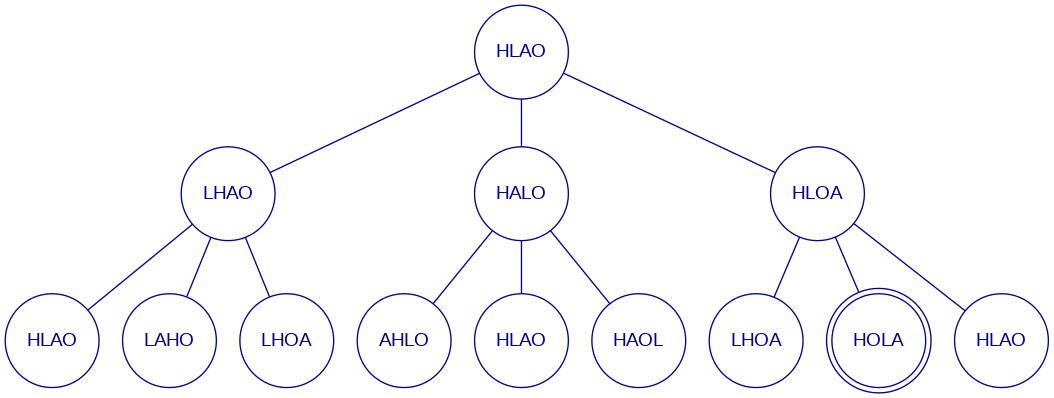

In [3]:

from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

def heuristic(nodo_actual,nodo_fin):
    return [x != y for (x, y) in zip(nodo_actual, nodo_fin)].count(True)
# posiciones
# H L A O
# 0 1 2 3
# LHAO HALO HLOA
# 1023 0213 0132

def sucesores(n,s,ni):

    return [[n[1]+n[0]+n[2]+n[3],heuristic(n[1]+n[0]+n[2]+n[3],s),inc(),ni[3]+1],
            [n[0]+n[2]+n[1]+n[3],heuristic(n[0]+n[2]+n[1]+n[3],s),inc(),ni[3]+1],
            [n[0]+n[1]+n[3]+n[2],heuristic(n[0]+n[1]+n[3]+n[2],s),inc(),ni[3]+1]]


    '''
    return [[n[1]+n[0]+n[2]+n[3],heuristic(n[1]+n[0]+n[2]+n[3],s),inc()],
            [n[0]+n[2]+n[1]+n[3],heuristic(n[0]+n[2]+n[1]+n[3],s),inc()],
            [n[0]+n[1]+n[3]+n[2],heuristic(n[0]+n[1]+n[3]+n[2],s),inc()]]
    '''
def breadthlimitedASC(begin,end,limit):
    l = [[begin, heuristic(begin, end),inc(),0]]
    visited = []
    cont =0;
    while l:

      current = l.pop(0)
      visited.append(current)
      dot.node(str(current[2]), str(current[0]))
      if current[0]== end:
              dot.node(str(current[2]), str(current[0]),shape='doublecircle')
              print("Visited:"+str(len(visited))+" nodes \n")
              print("No visited:"+str(len(l))+" nodes \n")
              return print("Found:"+str(i)+" nodes")
      if current[3]< limit:
          tmp =  sucesores(current[0],end,current)
          #tmp.reverse()
          if tmp:
              for x in tmp:
                  dot.node(str(x[2]), str(x[0]))
                  dot.edge(str(current[2]), str(x[2]))
              l.extend(tmp)
              #l.sort(key=lambda x: int(x[1]))
    print("Not Found:"+str(i)+" nodes")







dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')
# ejemplo 1
breadthlimitedASC("HLAO","HOLA",2)

#breadthlimitedASC("halo","hola",3)

# ejemplo 2
#bestfirst("HLAO","HOLA",6)

dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')



Visited:12 nodes 

No visited:22 nodes 

Found:34 nodes


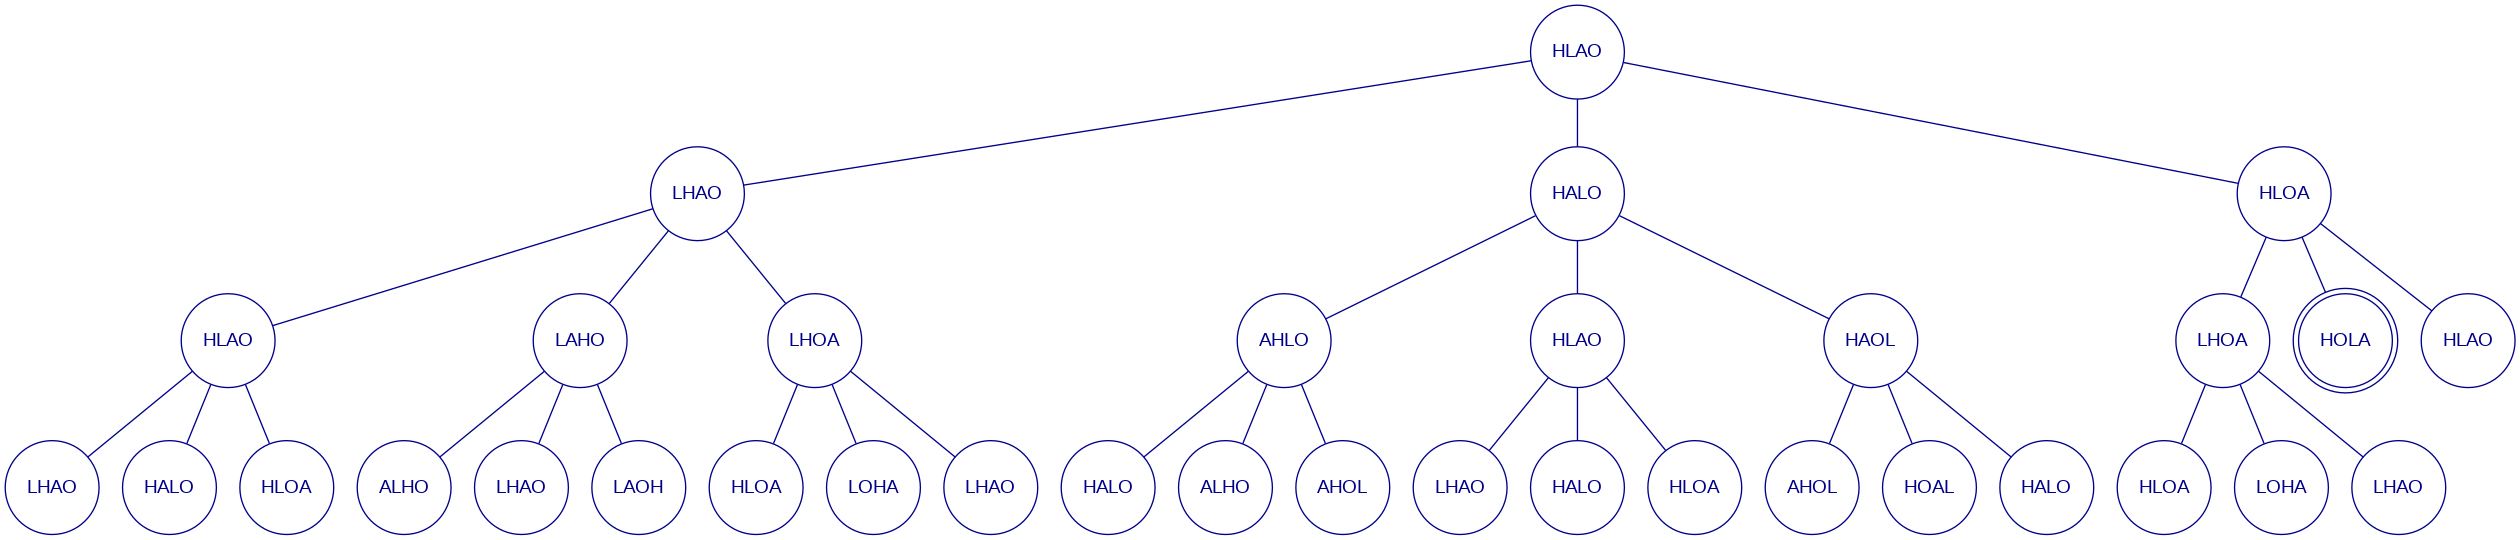

In [ ]:

from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

def heuristic(nodo_actual,nodo_fin):
    return [x != y for (x, y) in zip(nodo_actual, nodo_fin)].count(True)
# posiciones
# H L A O
# 0 1 2 3
# LHAO HALO HLOA
# 1023 0213 0132

def sucesores(n,s):
    return [[n[1]+n[0]+n[2]+n[3],heuristic(n[1]+n[0]+n[2]+n[3],s),inc()],
            [n[0]+n[2]+n[1]+n[3],heuristic(n[0]+n[2]+n[1]+n[3],s),inc()],
            [n[0]+n[1]+n[3]+n[2],heuristic(n[0]+n[1]+n[3]+n[2],s),inc()]]

def breadthlimitedASC(begin,end):
    l = [[begin, heuristic(begin, end),inc()]]
    visited = []
    cont =0;
    while l:
      current = l.pop(0)
      visited.append(current)
      dot.node(str(current[2]), str(current[0]))
      if current[0]== end:
              dot.node(str(current[2]), str(current[0]),shape='doublecircle')
              print("Visited:"+str(len(visited))+" nodes \n")
              print("No visited:"+str(len(l))+" nodes \n")
              return print("Found:"+str(i)+" nodes")
      tmp =  sucesores(current[0],end)
      #tmp.reverse()
      if tmp:
              for x in tmp:
                  dot.node(str(x[2]), str(x[0]))
                  dot.edge(str(current[2]), str(x[2]))
              l.extend(tmp)
    print("Not Found:"+str(i)+" nodes")







dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')
# ejemplo 1
breadthlimitedASC("HLAO","HOLA")
dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image
# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')

In [ ]:
def get_transformed_words(word):
    transformed_words = []
    for i in range(len(word) - 1):
        transformed_word = list(word)
        transformed_word[i], transformed_word[i + 1] = transformed_word[i + 1], transformed_word[i]
        transformed_words.append(''.join(transformed_word))
    return transformed_words

def generate_tree_with_limit(initial_word, limit):
    tree = []
    queue = [(initial_word, 0)]

    while queue:
        node, level = queue.pop(0)
        tree.append((node, level))

        if level < limit:
            transformed_words = get_transformed_words(node)
            queue.extend([(w, level + 1) for w in transformed_words])

    return tree

# Palabra inicial
initial_word = "HLAO"
limit = 2

# Generar el árbol y contar los nodos
tree = generate_tree_with_limit(initial_word, limit)
num_nodes = len(tree)

# Imprimir los nodos generados
for node, level in tree:
    print(f"{' ' * (level * 2)}{node}")

print("Número total de nodos generados:", num_nodes)


HLAO
  LHAO
  HALO
  HLOA
    HLAO
    LAHO
    LHOA
    AHLO
    HLAO
    HAOL
    LHOA
    HOLA
    HLAO
Número total de nodos generados: 13


Ejercicio 2

Considerar la palabra desordenada OHAL, se desea obtener la palabra HOLA con
cambios entre dos posiciones contiguas, en el siguiente orden: el hijo izquierdo
de OHAL sería HOAL, el medio sería OAHL y el derecho sería OHLA. Elabore el
árbol por profundidad, ¿cuántos nodos se generaron?

Visited:5 nodes 

No visited:2 nodes 

Found:7 nodes


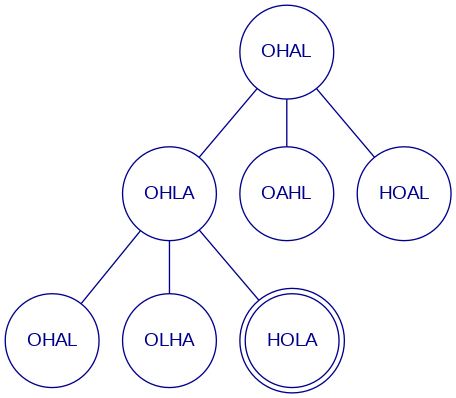

In [ ]:


from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i


def heuristic(nodo_actual,nodo_fin):
    return [x != y for (x, y) in zip(nodo_actual, nodo_fin)].count(True)
# posiciones
# O H A L
# 0 1 2 3
# HOAL OAHL OHLA
# 1023 0213 0132

def sucesores(n,s,nivel):
    return [[n[1]+n[0]+n[2]+n[3],heuristic(n[1]+n[0]+n[2]+n[3],s),inc(),nivel[3]+1],
            [n[0]+n[2]+n[1]+n[3],heuristic(n[0]+n[2]+n[1]+n[3],s),inc(),nivel[3]+1],
            [n[0]+n[1]+n[3]+n[2],heuristic(n[0]+n[1]+n[3]+n[2],s),inc(),nivel[3]+1]]


def backtrackingdesc(begin,end,limit):
    #l = [[begin,0,inc()]]
    l = [[begin, heuristic(begin, end),inc(),0]]
    visited = []
    while l:
      current = l.pop(0)
      visited.append(current)
      dot.node(str(current[2]), str(current[0]))
      if current[0]== end:
          dot.node(str(current[2]), str(current[0]),shape='doublecircle')
          print("Visited:"+str(len(visited))+" nodes \n")
          print("No visited:"+str(len(l))+" nodes \n")
          return print("Found:"+str(i)+" nodes")
      if current[3]< limit:
          #tmp =  succesors(current)
          tmp =  sucesores(current[0],end,current)
          tmp.reverse()
          if tmp:
              for x in tmp:
                  dot.node(str(x[2]), str(x[0]))
                  dot.edge(str(current[2]), str(x[2]))
              tmp.extend(l)
              l=tmp
              #l.extend(tmp)
    print("Not Found:"+str(i)+" nodes")


dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')
# ejemplo 1
backtrackingdesc("OHAL","HOLA",2)
dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image
# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')


**Busqueda por Anchura**

Suponga el siguiente grafo, para ir de A a D. Si se hubiera utilizado la busqueda por anchura sin repetir nodos ¿Cuantos nodos fueron generados?


Visited:4 nodes 

No visited:4 nodes 

Found:8 nodes


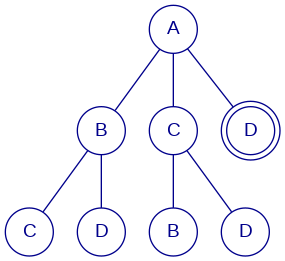

In [ ]:




from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

def succesors(n):
    if n[0] == 'A': return [['B',n[1]+2,inc(),n[3]+1], ['C',n[1]+3,inc(),n[3]+1],['D',n[1]+4,inc(),n[3]+1]]
    elif n[0] == 'B': return [['C',n[1]+1,inc(),n[3]+1],['D',n[1]+3,inc(),n[3]+1]]
    elif n[0] == 'C': return [['B',n[1]+1,inc(),n[3]+1],['D',n[1]+2,inc(),n[3]+1]]
    #elif n[0] == 'D': return [['B',n[1]+2,inc(),n[3]+1], ['E',n[1]+2,inc(),n[3]+1],['F',n[1]+4,inc(),n[3]+1]]
    #elif n[0] == 'E': return [['B',n[1]+1,inc(),n[3]+1], ['C',n[1]+5,inc(),n[3]+1],['D',n[1]+2,inc(),n[3]+1], ['F',n[1]+1,inc(),n[3]+1]]
    #elif n[0] == 'F': return [['D',n[1]+4,inc(),n[3]+1], ['E',n[1]+1,inc(),n[3]+1]]
    else: return None

def breadthlimitedASC(begin,end):
    l = [[begin,0,inc(),0]]
    visited = []
    while l:
      current = l.pop(0)
      visited.append(current)
      dot.node(str(current[2]), str(current[0]))
      if current[0]== end:
          dot.node(str(current[2]), str(current[0]),shape='doublecircle')
          print("Visited:"+str(len(visited))+" nodes \n")
          print("No visited:"+str(len(l))+" nodes \n")
          return print("Found:"+str(i)+" nodes")
      #if current[3]< limit:
      tmp =  succesors(current)
      if tmp:
              for x in tmp:
                  dot.node(str(x[2]), str(x[0]))
                  dot.edge(str(current[2]), str(x[2]))
              l.extend(tmp)
    print("Not Found:"+str(i)+" nodes")



dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')

breadthlimitedASC('A','D')


dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')




Considerar el grafo con aristas (A,B,2),(A,C,3),(A,D,4),(B,C,1),(C,B,1),(B,D,3),(C,D,2); utilizar la busqueda de costo uniforme para ir de A hacia D
1. ¿cual es la distancia  mas corta encontrada?
2. Analizando el resultado del árbol, si se hubiera utilizado la búsqueda por anchura. ¿Cuántos nodos no se hubieran generado?


Visited:5 nodes 

No visited:5 nodes 

Found:10 nodes
SOLUCION


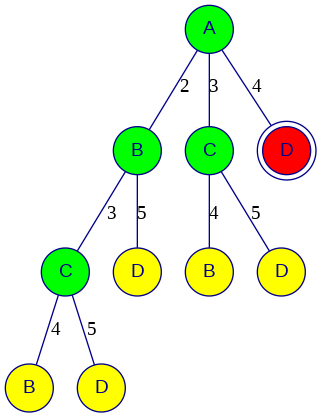

In [9]:

from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

def sucs(n):
    if n[0] == 'A': return   [['B',n[1]+2,inc()], ['C',n[1]+3,inc()],['D',n[1]+4,inc()],]
    elif n[0] == 'B': return [['C',n[1]+1,inc()],['D',n[1]+3,inc()]]
    elif n[0] == 'C': return [['B',n[1]+1,inc()],['D',n[1]+2,inc()]]
    else: return None



def costo_uniforme(nodo_inicio,nodo_fin):
  lista=[[nodo_inicio,0,inc()]]
  visited = []
  while lista:
    nodo_actual = lista.pop(0)
    visited.append(nodo_actual)
    dot.node(str(nodo_actual[2]), str(nodo_actual[0]) ,fillcolor='green',style='filled')
    if nodo_actual[0] == nodo_fin[0]:
        dot.node(str(nodo_actual[2]), str(nodo_actual[0]),fillcolor='red',style='filled',shape='doublecircle')
        print("Visited:"+str(len(visited))+" nodes \n")
        print("No visited:"+str(len(lista))+" nodes \n")
        print("Found:"+str(i)+" nodes")
        return print("SOLUCION")
    temp = sucs(nodo_actual)
    if temp:
        lista.extend(temp)
        lista.sort(key=lambda x: int(x[1]))
        for x in temp:
                  dot.node(str(x[2]), str(x[0]),fillcolor='yellow',style='filled')
                  dot.edge(str(nodo_actual[2]), str(x[2]),label = str(x[1]))

  print("NO-SOLUCION")



def breadthlimitedASC(begin,end):
    #l = [[begin,0,inc(),0]]
    l=[[begin,0,inc()]]
    visited = []
    while l:
      current = l.pop(0)
      visited.append(current)
      dot.node(str(current[2]), str(current[0]))
      if current[0]== end:
          dot.node(str(current[2]), str(current[0]),shape='doublecircle')
          print("Visited:"+str(len(visited))+" nodes \n")
          print("No visited:"+str(len(l))+" nodes \n")
          return print("Found:"+str(i)+" nodes")
      #if current[3]< limit:
      tmp =  sucs(current)
      if tmp:
              for x in tmp:
                  dot.node(str(x[2]), str(x[0]))
                  dot.edge(str(current[2]), str(x[2]))
              l.extend(tmp)
    print("Not Found:"+str(i)+" nodes")


dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')

#breadthlimitedASC('A','D')
costo_uniforme('A','D')

dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')

Considerar el problemas de las jarras (4L,3L) con estado inicial (0,0) y estado final (2,0),
y la búsqueda por profundidad sin repetir nodos. Con orden de reglas: llenar 4L, llenar
3L, vaciar 4L, vaciar 3L, pasar 4 a 3, pasar de 3 a 4. ¿Cuántos nodos fueron visitados?

In [ ]:
from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

def succesor(n):
    if n[0] == 'A': return [['B',n[1]+1,inc()], ['C',n[1]+1,inc()], ['E',n[1]+1,inc()]]
    elif n[0] == 'B': return [['D',n[1]+1,inc()], ['E',n[1]+1,inc()]]
    elif n[0] == 'C': return [['E',n[1]+1,inc()], ['F',n[1]+1,inc()]]
    elif n[0] == 'D': return [['G',n[1]+1,inc()]]
    elif n[0] == 'E': return [['G',n[1]+1,inc()],['H',n[1]+1,inc()]]
    elif n[0] == 'F': return [['H',n[1]+1,inc()]]
    elif n[0] == 'H': return [['I',n[1]+1,inc()]]
    elif n[0] == 'G': return [['I',n[1]+1,inc()]]

    else: return None

def profundidad (begin, end):
    l = [[begin,0,inc()]]
    visited = []
    while l:
        current = l.pop(0)
        visited.append(current)
        dot.node(str(current[2]), str(current[0]),fillcolor='green',style='filled')
        if current[0]== end:
            dot.node(str(current[2]), str(current[0]),fillcolor='pink',style='filled',shape='doublecircle')
            print("Visited: "+str(len(visited))+" nodes")
            print("No visited: "+str(len(l))+" nodes")
            return print("Found:"+str(i)+" nodes")
        tmp =  succesor(current)
        tmp.reverse()
        if tmp:
                for x in tmp:
                    dot.node(str(x[2]), str(x[0]),fillcolor='yellow',style='filled')
                    dot.edge(str(current[2]), str(x[2]))
                tmp.extend(l)
                l = tmp

    print("Not Found:"+str(i)+" nodes")









dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')


inicio =[0,0]
end =[0,2]


profundidad(inicio, end)




dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')

Visited: 3 nodes
No visited: 9 nodes
Found:12 nodes


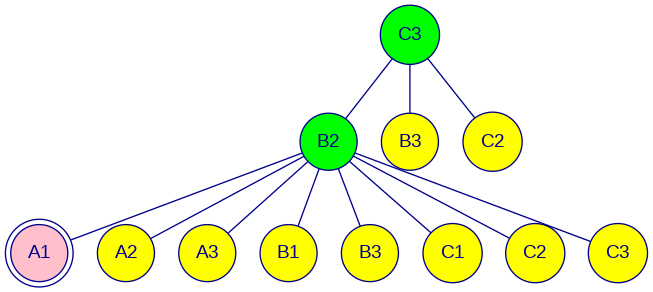

In [ ]:
from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

'''
# Numero de grados el numero de hijos en el arbol
'''
def succesor(n):
    if n[0]==   'A1': return [['A2',n[1]+1,inc()],['B1',n[1]+1,inc()],['B2',n[1]+1,inc()]]
    elif n[0]== 'B1': return [['A1',n[1]+1,inc()],['A2',n[1]+1,inc()],['B2',n[1]+1,inc()],['C1',n[1]+1,inc()],['C2',n[1]+1,inc()]]
    elif n[0]== 'C1': return [['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['C2',n[1]+1,inc()]]
    elif n[0]== 'A2': return [['A1',n[1]+1,inc()],['A3',n[1]+1,inc()],['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()]]
    elif n[0]== 'B2': return [['A1',n[1]+1,inc()],['A2',n[1]+1,inc()],['A3',n[1]+1,inc()],['B1',n[1]+1,inc()],['B3',n[1]+1,inc()],
     ['C1',n[1]+1,inc()],['C2',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'C2': return [['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()],['C1',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'A3': return [['A2',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()]]
    elif n[0]== 'B3': return [['A2',n[1]+1,inc()],['A3',n[1]+1,inc()],['B2',n[1]+1,inc()],['C2',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'C3': return [['B2',n[1]+1,inc()],['B3',n[1]+1,inc()],['C2',n[1]+1,inc()]]

    else : return None


def profundidad (begin, end):
    l = [[begin,0,inc()]]
    visited = []
    while l:
        current = l.pop(0)
        visited.append(current)
        dot.node(str(current[2]), str(current[0]),fillcolor='green',style='filled')
        if current[0]== end:
            dot.node(str(current[2]), str(current[0]),fillcolor='pink',style='filled',shape='doublecircle')
            print("Visited: "+str(len(visited))+" nodes")
            print("No visited: "+str(len(l))+" nodes")
            return print("Found:"+str(i)+" nodes")
        tmp =  succesor(current)
        #tmp.reverse()
        if tmp:
                for x in tmp:
                    dot.node(str(x[2]), str(x[0]),fillcolor='yellow',style='filled')
                    dot.edge(str(current[2]), str(x[2]))
                tmp.extend(l)
                l = tmp

    print("Not Found:"+str(i)+" nodes")




dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')

profundidad('C3', 'A1')




dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')





***Arbol por anchura ***


In [ ]:
from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i

'''
# Numero de grados el numero de hijos en el arbol
'''
def succesor(n):
    if n[0]==   'A1': return [['A2',n[1]+1,inc()],['B1',n[1]+1,inc()],['B2',n[1]+1,inc()]]
    elif n[0]== 'B1': return [['A1',n[1]+1,inc()],['A2',n[1]+1,inc()],['B2',n[1]+1,inc()],['C1',n[1]+1,inc()],['C2',n[1]+1,inc()]]
    elif n[0]== 'C1': return [['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['C2',n[1]+1,inc()]]
    elif n[0]== 'A2': return [['A1',n[1]+1,inc()],['A3',n[1]+1,inc()],['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()]]
    elif n[0]== 'B2': return [['A1',n[1]+1,inc()],['A2',n[1]+1,inc()],['A3',n[1]+1,inc()],['B1',n[1]+1,inc()],['B3',n[1]+1,inc()],
     ['C1',n[1]+1,inc()],['C2',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'C2': return [['B1',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()],['C1',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'A3': return [['A2',n[1]+1,inc()],['B2',n[1]+1,inc()],['B3',n[1]+1,inc()]]
    elif n[0]== 'B3': return [['A2',n[1]+1,inc()],['A3',n[1]+1,inc()],['B2',n[1]+1,inc()],['C2',n[1]+1,inc()],['C3',n[1]+1,inc()]]
    elif n[0]== 'C3': return [['B2',n[1]+1,inc()],['B3',n[1]+1,inc()],['C2',n[1]+1,inc()]]

    else : return None


def profundidad (begin, end):
    l = [[begin,0,inc()]]
    visited = []
    while l:
        current = l.pop(0)
        visited.append(current)
        dot.node(str(current[2]), str(current[0]),fillcolor='green',style='filled')
        if current[0]== end:
            dot.node(str(current[2]), str(current[0]),fillcolor='pink',style='filled',shape='doublecircle')
            print("Visited: "+str(len(visited))+" nodes")
            print("No visited: "+str(len(l))+" nodes")
            return print("Found:"+str(i)+" nodes")
        tmp =  succesor(current)
        #tmp.reverse()
        if tmp:
                for x in tmp:
                    dot.node(str(x[2]), str(x[0]),fillcolor='yellow',style='filled')
                    dot.edge(str(current[2]), str(x[2]))
                tmp.extend(l)
                l = tmp

    print("Not Found:"+str(i)+" nodes")




dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')

profundidad('C3', 'A1')




dot.view()
dot.render('arbol_busqueda_limitado', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('arbol_busqueda_limitado.png')
